In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from missing import plot_missing_percentage as pmp

In [2]:
pcb = pd.read_csv('.././data/POS_CASH_balance.csv')

In [5]:
display(pcb.sample(10))
print(f'POS CASH balance data shape:\n{pcb.shape}')
print('\nPOS CASH balance data info:')
print(pcb.info())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
8537601,1728288,122076,-18,12.0,10.0,Active,0,0
1130530,1604570,128402,-4,48.0,31.0,Active,0,0
1963822,2557551,343726,-10,12.0,4.0,Active,0,0
4446768,2713470,332300,-71,11.0,7.0,Active,0,0
7093821,2378104,195821,-67,36.0,17.0,Active,0,0
4078172,1391185,299812,-51,10.0,4.0,Active,0,0
8103252,1880396,218063,-44,24.0,17.0,Active,0,0
2809006,1237286,210204,-45,10.0,2.0,Active,0,0
145213,1010460,310468,-45,6.0,1.0,Active,0,0
5077408,2233805,349195,-24,12.0,9.0,Active,0,0


POS CASH balance data shape:
(10001358, 8)

POS CASH balance data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


## Duplicate Values Checking

In [7]:
pcb.duplicated().sum()

0

## Missing values checking and handle

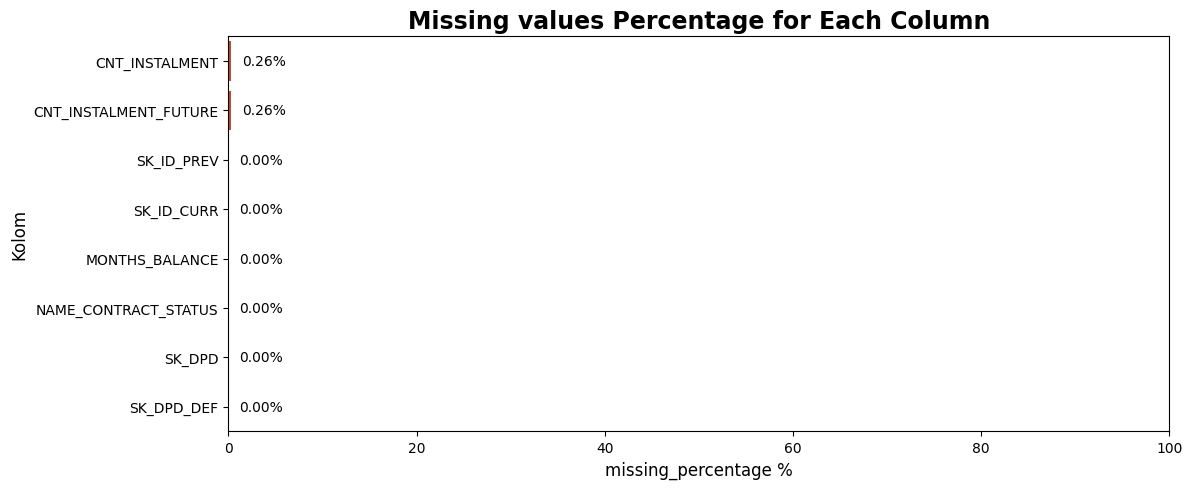

In [8]:
pmp(pcb)

In [27]:
pcb.loc[pcb['CNT_INSTALMENT'].isna()].sample(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2901796,1521928,234875,-14,NaN,NaN,Signed,0,0
4834594,2273994,231132,-18,NaN,NaN,Signed,0,0
6626672,2320402,236263,-2,NaN,NaN,Signed,0,0
5527563,1179565,333523,-16,NaN,NaN,Signed,0,0
2168798,2115342,274871,-24,NaN,NaN,Signed,0,0
6237612,2038522,326209,-14,NaN,NaN,Signed,0,0
8093054,2189069,426016,-19,NaN,NaN,Signed,0,0
6626681,1161234,366149,-4,NaN,NaN,Signed,0,0
1063680,1448384,298198,-24,NaN,NaN,Approved,0,0
9874779,1315740,334354,-5,NaN,NaN,Signed,0,0


becauset the missing values seems reasonable, i decided to fill the missing values with 0.

In [28]:
pcb_clean = pcb.fillna(0)
pcb_clean.to_csv('.././data/POS_CASH_balance_clean.csv', index=False)